## Task1: 数据分析

表格中 "status" 是结果标签：0表示未逾期，1表示逾期。

In [3]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
data = pd.read_csv('./data/data.csv', encoding='gbk')
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,NaN,19890,0,30.0,20130817.0,149050,151.0,0.40,34030,7.0,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,xs,1738.0,85.0,蒋红,583.0,79.0,8.0,2.0,6.0,10.0,2018-04-25,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2018-04-19,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970,0,23.0,20160402.0,302910,224.0,0.35,10590,5.0,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,xs,779.0,84.0,崔向朝,653.0,73.0,7.0,4.0,2.0,8.0,2018-05-03,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2018-05-05,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,NaN,9710,0,9.0,20170617.0,11520,31.0,1.00,5710,5.0,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,xs,338.0,95.0,王中云,654.0,76.0,11.0,5.0,5.0,16.0,2018-05-05,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,2018-05-01,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,NaN,6210,0,33.0,20130516.0,491130,360.0,0.15,91690,7.0,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,xs,1831.0,82.0,何洋洋,595.0,79.0,12.0,7.0,4.0,22.0,2018-05-05,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,2018-05-03,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.

In [5]:
data.info()

print()
print("共有数据集：", data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [6]:
for i,name in enumerate(data.columns):
    name_sum = data[name].value_counts().shape[0]
    print("{:2}、{:40}      The number of types of features is：{}".format(i + 1, name, name_sum))

 1、Unnamed: 0                                    The number of types of features is：4754
 2、custid                                        The number of types of features is：4754
 3、trade_no                                      The number of types of features is：4754
 4、bank_card_no                                  The number of types of features is：1
 5、low_volume_percent                            The number of types of features is：40
 6、middle_volume_percent                         The number of types of features is：90
 7、take_amount_in_later_12_month_highest         The number of types of features is：166
 8、trans_amount_increase_rate_lately             The number of types of features is：782
 9、trans_activity_month                          The number of types of features is：84
10、trans_activity_day                            The number of types of features is：512
11、transd_mcc                                    The number of types of features is：41
12、trans_days_interval_filter      

In [7]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,4752.000000,1756.000000,4.754000e+03,4754.000000,4752.000000,4.752000e+03,4.754000e+03,4752.000000,4752.000000,4.754000e+03,4752.000000,4754.000000,4752.000000,4754.000000,4650.000000,4746.000000,4746.000000,4746.000000,4746.000000,4328.000000,4738.000000,4738.000000,4738.000000,4.728000e+03,4754.000000,4746.000000,4742.000000,4754.000000,4754.000000,4742.000000,4754.000000,4752.000000,4752.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4450.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,2.678662,1.001139,1.870201e+04,0.011149,23.033880,2.015109e+07,2.307359e+05,176.109428,0.476926,3.896430e+04,6.572601,9344.350021,0.355745,1237.088767,0.514667,7.134008,20.174673,7.047198,20.649600,0.642329,1.656184,4.529759,5.232165,1.553622e+05,2886.964661,6.055626,0.030789,1321.201094,18958.460244,0.014340,0.250947,1036.274621,89.006944,576.632584,75.998876,11.974382,6.020000,3.784719,16.891236,4.329438,8.771910,12.364270,543.205968,75.438636,35.952210,31.039937,2.308952,12.845412,4.732331,8.113081,0.965896,2.821853,13.926857,43.145614,17.708548,1.224366,1.311420,335.159973,2089.297734,71.992372,8.113081,8.685214,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,0.890360,0.033739,5.221783e+04,0.105007,10.057837,1.480487e+04,3.204931e+05,99.687285,0.263769,1.017461e+05,1.390723,27007.597

In [8]:
data.status.value_counts()

0    3561
1    1193
Name: status, dtype: int64

**结论一：** 可以看到数据共有4754行，其中浮点型数据70列、整数型13列、object 型7列，需要对 object 类型的数据进行处理才能建立模型。

**结论二：** 数据在整体上是相当完整的，除了 student_feature 这个标签有较多缺失值以外，其他数据仅有很小的缺失。

**结论三：** 大部分数据特征存在拖尾现象， 即特征的 max(min) 明显偏离其 mean ，需要对这些数据进行进一步的处理才能建立准确的模型。

**结论四：**数据集正例与负例数量存在显著差异， 需要使用 分层抽样 的方式对数据集进行抽样划分，否则会导致 模型对未逾期结果预测较为准确，而对逾期结果预测偏差较大。

注意： 有的列像 'first_transaction_time'，它的值其实是日期的形式类似 20130817 这样，pandas 把它认为是 int 型的，其实不是，这也需要注意。

### 2 无关特征的删除
显然，上述特征中存在一些与贷款用户是否会逾期无关的特征。

经分析，无关特征及字段如下：

- 'Unnamed: 0'
- 客户id：'custid'
- 流水号：'trade_no'
- 卡号：'bank_card_no'
- 资源：'source'
- 客户姓名：'id_name'
- 最新查询时间：'latest_query_time'
- 最新贷款时间：'loans_latest_time'

In [9]:
data = data.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name', 'latest_query_time','loans_latest_time'], axis = 1)
data.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,NaN,19890,0,30.0,20130817.0,149050,151.0,0.40,34030,7.0,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,1738.0,85.0,583.0,79.0,8.0,2.0,6.0,10.0,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.0,16970,0,23.0,20160402.0,302910,224.0,0.35,10590,5.0,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,779.0,84.0,653.0,73.0,7.0,4.0,2.0,8.0,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,NaN,9710,0,9.0,20170617.0,11520,31.0,1.00,5710,5.0,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,338.0,95.0,654.0,76.0,11.0,5.0,5.0,16.0,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,NaN,6210,0,33.0,20130516.0,491130,360.0,0.15,91690,7.0,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,1831.0,82.0,595.0,79.0,12.0,7.0,4.0,22.0,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,NaN,11150,0,12.0,20170312.0,61470,63.0,0.65,9770,6.0,760,1.00,1110,0.50,一线城市,0.0,66.0,0.0,66.0,0.0,3.0,3.0,3.0,0.0,1000,3.0,0.0,0,6410,0.0,1,435.0,88.0,541.0,75.0,11.0,3.0,4.0,14.0,6.0,8.0,9.0,479.0,73.0,37.0,32.0,6.0,12.0,2.0,10.0,0.0,0.0,10.0,36.0,25.0,0.0,0.0,360.0,1800.0,72.0,10.0,10.0,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0



### 3 数据类型转换
经过无关特征删除后，我们还有两个特征需要进行转换：

- object 类型特征（城市等级：'reg_preference_for_trad'）
- 时间格式特征（首次交易时间：'first_transaction_time_day'）
#### 3.1  reg_preference_for_trad 转换

首先我们查看一下该特征下有哪些数据

In [10]:
data.reg_preference_for_trad.unique()

array(['一线城市', '三线城市', '境外', '二线城市', '其他城市', nan], dtype=object)

In [11]:
dic = {'一线城市': 1,
       '二线城市': 2,
       '三线城市': 3,
       '其他城市': 4,
       '境外': 0}
data.reg_preference_for_trad = data.reg_preference_for_trad.map(dic)

#### 3.2  first_transaction_time_day 转换

对于时间数据，这里将年月日分别建立新的列处理

In [12]:
tmpdf = pd.DataFrame()
tmpdf['first_transaction_time_year'] = pd.to_datetime(data['first_transaction_time'], format='%Y%m%d').dt.year
tmpdf['first_transaction_time_month'] = pd.to_datetime(data['first_transaction_time'], format='%Y%m%d').dt.month
tmpdf['first_transaction_time_day'] = pd.to_datetime(data['first_transaction_time'], format='%Y%m%d').dt.day
data[tmpdf.columns] = tmpdf
data = data.drop('first_transaction_time_day', axis = 1)

In [13]:
print(data.dtypes.value_counts())

float64    73
int64      11
dtype: int64



#### 4 处理缺失值
- 删除缺失值较多的行列

若某个特征的缺失值超过 30%，那么它会损失特征的关键信息。

同样若某个样本的缺失值过多，那么它也不再具有统计学意义。

因此我们对这样的行或列直接进行删除。

In [14]:
data = data.dropna(axis=1, thresh = 1000)#删除缺失值超过 70% 的列
data = data.dropna(axis=0, thresh = 75)#删除缺失值超过75个的行

- 填充缺失值

对于剩余的缺失值，这里采用**平均值填充法**进行填充。

In [15]:
data = data.fillna(data.median())

### 异常检验

In [20]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    LOF = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    LOF.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = LOF.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -LOF._decision_function(predict.iloc[:, :-1])
    return predict

def lof(data, predict=None, k=10, method=1):
    import pandas as pd
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict = localoutlierfactor(data, predict, k)
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

out_data, in_data = lof(data, k=10, method = 2)
data.drop(out_data.index, axis = 0)

out_data

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,first_transaction_time_year,first_transaction_time_month,k distances,local outlier factor
3239,0.02,0.87,33800,0.03,0.72,0.441,21.0,18.0,11.0,4.0,1.0,6400,0,29.0,20141129.0,143830,251.0,0.55,17780,5.0,21950,0.30,1260,0.50,3.0,7.0,18.0,4.0,18.0,0.0,0.0,1.0,1.0,0.0,690,3.0,0.0,490,22730,0.0,0,1269.0,82.0,638.0,80.0,7.0,3.0,1.0,11.0,6.0,8.0,11.0,612.0,75.0,15.0,14.0,0.0,8.0,2.0,6.0,1.0,3.0,9.0,18.0,1.0,2.0,0.0,329.0,2600.0,73.0,6.0,6.0,5300.0,2566.0,1000.0,79.0,2.0,3.0,1000.0,1000.0,12.0,23.0,2014.0,11.0,3.969343e+04,2.003446
1851,0.05,0.74,23000,0.58,0.93,0.869,22.0,6.0,7.0,2.0,1.0,56460,0,28.0,20150929.0,1208760,408.0,0.05,174080,5.0,46560,0.05,850,0.65,3.0,5.0,6.0,5.0,6.0,0.0,0.0,1.0,2.0,527125.0,7100,8.0,0.0,7100,95800,0.0,0,965.0,82.0,588.0,77.0,28.0,7.0,7.0,36.0,21.0,29.0,31.0,568.0,77.0,78.0,78.0,2.0,27.0,14.0,13.0,5.0,9.0,24.0,109.0,0.0,6.0,0.0,350.0,2600.0,74.0,13.0,14.0,7500.0,2330.0,8600.0,80.0,14.0,16.0,19200.0,8428.0,14.0,16.0,2015.0,9.0,5.123073e+05,2.034650
4006,0.00,0.74,2700,0.00,0.29,0.624,19.0,22.0,67.0,2.0,1.0,387920,0,16.0,20130818.0,390300,212.0,0.55,50830,6.0,210660,0.65,1790,0.40,1.0,16.0,16.0,16.0,16.0,0.0,1.0,12.0,12.0,0.0,1460,9.0,0.0,0,65520,0.0,0,1737.0,83.0,523.0,76.0,28.0,12.0,10.0,47.0,9.0,19.0,27.0,472.0,76.0,115.0,86.0,23.0,30.0,11.0,19.0,3.0,5.0,51.0,105.0,114.0,4.0,8.0,354.0,1700.0,75.0,19.0,20.0,4300.0,1542.0,34700.0,76.0,11.0,13.0,65100.0,26018.0,10.0,7.0,2013.0,8.0,3.187014e+05,2.061249
560,0.00,0.63,15000,0.14,1.00,0.475,26.0,53.0,31.0,4.0,1.0,195510,0,21.0,20160630.0,939350,222.0,0.05,582470,8.0,48880,0.05,2480,0.35,1.0,9.0,12.0,9.0,12.0,5.0,7.0,7.0,7.0,48.0,27990,21.0,0.0,90200,525360,0.0,1,690.0,83.0,525.0,73.0,10.0,7.0,3.0,11.0,0.0,0.0,6.0,513.0,73.0,14.0,10.0,2.0,5.0,2.0,3.0,1.0,2.0,8.0,11.0,7.0,0.0,1.0,345.0,2300.0,71.0,3.0,3.0,5500.0,2466.0,8200.0,77.0,2.0,2.0,9600.0,7200.0,138.0,13.0,2016.0,6.0,5.512794e+05,2.069898
4640,0.03,0.70,5000,0.15,1.00,0.538,18.0,10.0,14.0,2.0,1.0,67450,0,7.0,20170816.0,171130,113.0,0.50,34420,4.0,67790,0.15,1250,0.50,1.0,5.0,10.0,5.0,10.0,0.0,6.0,6.0,6.0,365643.0,1030,12.0,0.0,230,48610,0

- 数据集划分

In [54]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=2018)


In [65]:
y_train = train_data.status.values
y_test = test_data.status.values

X_train = train_data.drop('status', axis = 1)
X_test = test_data.drop('status', axis = 1)

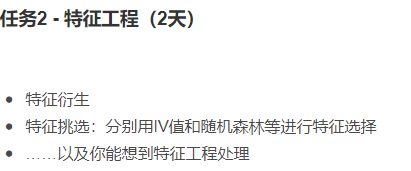

## 特征产生

## IV特征选择
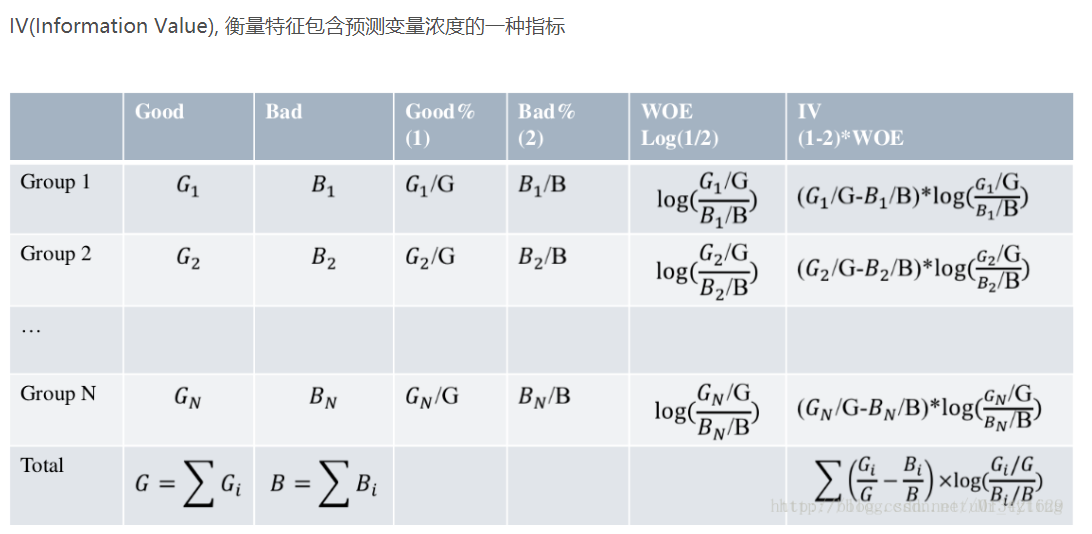

[使用IV值和随机森林进行特征选择](http://yezuolin.com/2018/11/IV&RandomForestClassifier/)

## 随机森林

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test,y_pred))

auc: 0.5953937923720124


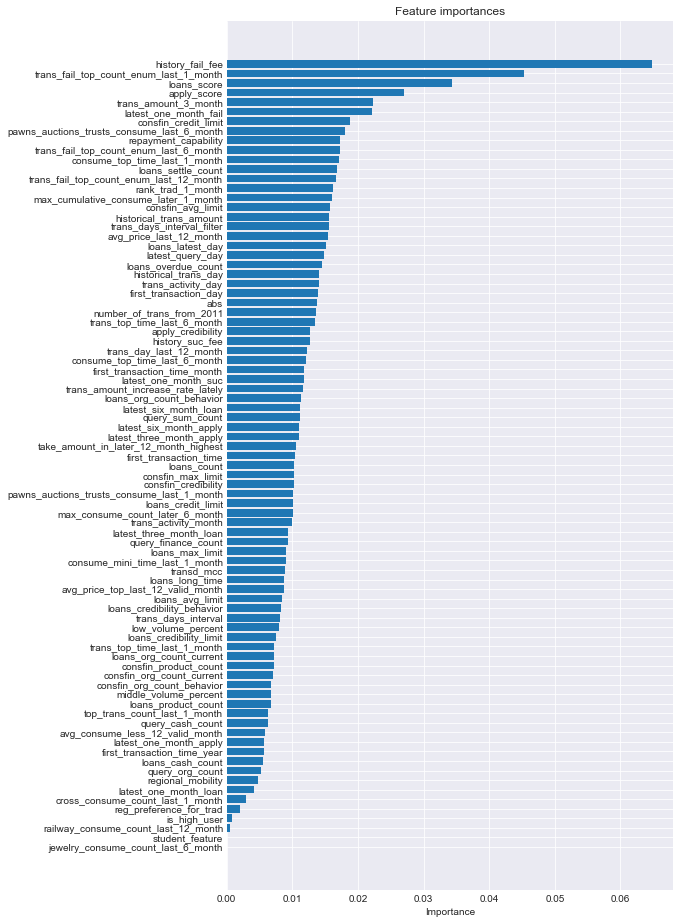

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(8,16))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

- 可见特征筛选后提高了一点

In [63]:
select_fea = features_list[sorted_idx][10:]
X_train = X_train[select_fea]
X_test = X_test[select_fea]

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import roc_auc_score
print('auc:',roc_auc_score(y_test,y_pred))

auc: 0.6006132039540375


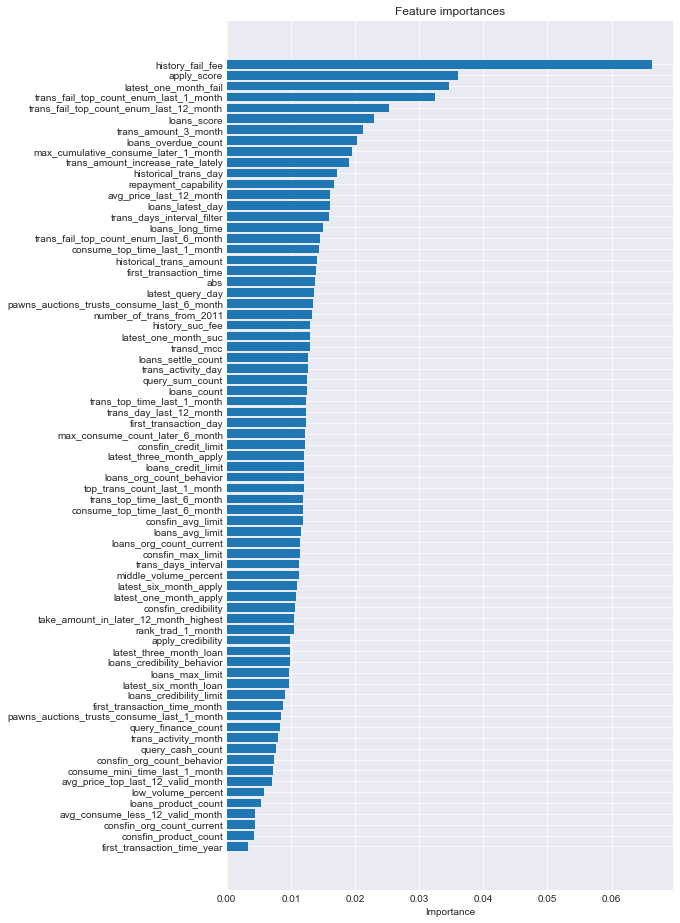

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
 
features_list = X_train.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
 
plt.figure(figsize=(8,16))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()